<a href="https://colab.research.google.com/github/pablomiralles22/class-CV-computer-vision/blob/main/CLIP_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We install the required libraries: `transformers` for working with CLIP, `torch` for tensor operations and inference, `torchvision` for image processing utilities, and `matplotlib` + `Pillow` for image visualization and manipulation.

In [1]:
!pip install transformers torch torchvision matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Import necessary modules:

In [9]:
import requests
import matplotlib.pyplot as plt

from PIL import Image
from transformers import CLIPProcessor, CLIPModel

We load the `CLIPModel` and its corresponding `CLIPProcessor`. The processor handles preprocessing of both images and text, while the model computes embeddings and similarity scores.


In [6]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

We define a list of two image URLs (dog and cat). Images are downloaded using `requests` and loaded using PIL. We also define a list of text descriptions to compare against.

In [32]:
# URLs of multiple images
image_urls = [
    "http://images.cocodataset.org/val2017/000000039769.jpg",  # cats
    "https://farm4.staticflickr.com/3453/3908947202_20448c72c1_z.jpg"   # dogs
]

# Load images
images = [Image.open(requests.get(url, stream=True).raw) for url in image_urls]

# Texts for comparison
texts = ["a photo of a cat", "a photo of a dog", "a photo of a car"]

## Compare One Image to Multiple Texts

We pick the first image (cats) and encode it alongside the text prompts. The model returns similarity logits, which are normalized using softmax to get probabilities. These probabilities indicate how well each text describes the image.

In [33]:
single_image = images[0]
inputs = processor(text=texts, images=single_image, return_tensors="pt", padding=True)
outputs = model(**inputs)
probs_texts = outputs.logits_per_image.softmax(dim=1).squeeze()

We plot the selected image and print the similarity probabilities for each text prompt.

a photo of a cat: 99.26%
a photo of a dog: 0.51%
a photo of a car: 0.23%


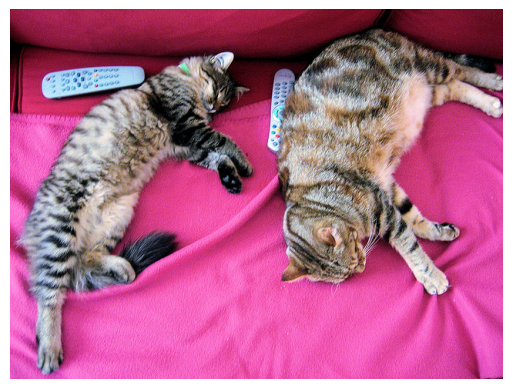

In [34]:
plt.plot(figsize=(6, 6))
plt.imshow(single_image)
plt.axis("off")

for text, prob in zip(texts, probs_texts):
    print(f"{text}: {prob.item():.2%}")

## Compare One Text to Multiple Images

We reverse the setup: now we use a single text query ("a photo of a dog") and compare it to both images. The model returns similarity scores for each image, normalized via softmax.

In [25]:
single_text = "a photo of a dog"
inputs = processor(text=single_text, images=images, return_tensors="pt", padding=True)
outputs = model(**inputs)
probs_images = outputs.logits_per_image.softmax(dim=0).squeeze()

We display both images side by side with their probability of matching the given text ("a photo of a dog").

Query: a photo of a dog


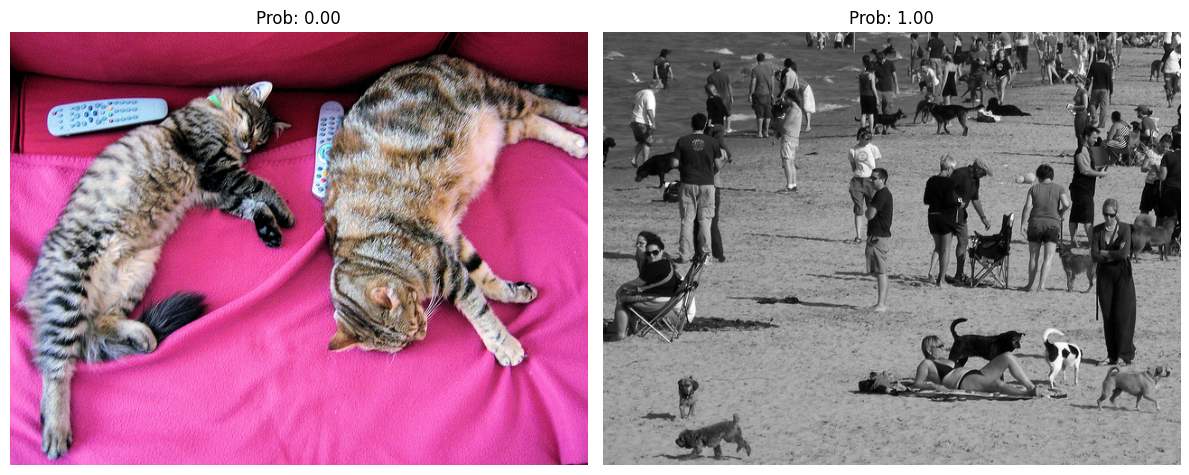

In [31]:
print(f"Query: '{single_text}'")

fig, axs = plt.subplots(1, len(images), figsize=(12, 6))

for i, (img, prob) in enumerate(zip(images, probs_images)):
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"Prob: {prob:.2f}")

plt.tight_layout()
plt.show()